# Edwin Zhou   

## Research question/interests

My research question: I want to know how video games changed over time.
- How did their prices change?
- How did more and more games develop? (What was the growth curve?)
- Did the number of games that implemented online multiplayer grow linearly or exponentially?
- Did more games add achievements over time?

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA
Note: EDA is very short since the dataset that we have chosen contained so much text. Data pipeline had to be established before further analysis could be completed.

In [37]:
tempdataset = pd.read_csv("../data/raw/steam_games.csv")
tempdataset.head(3)

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN


### Original price needs to be cleaned up to be of any use as can be seen from the unique filter

In [38]:
tempdataset['original_price'].unique()

array(['$19.99', '$29.99', '$39.99', '$44.99', 'Free', nan, '$59.99',
       '$14.99', '$49.99', 'Free to Play', '1.020', 'Free To Play',
       '$9.99', '$12.99', '$57.91', '$7.99', '$6.99', '$24.99',
       'Demo Middle-earth™: Shadow of War™', 'Play for Free!', '$13.99',
       '$59.98', '$69.99', '$76.95', '$84.97', '$58.89', '$8.99',
       '$75.95', '$34.99', '$151.89', '$4.99', '$84.93', '$86.92',
       '$20.00', '$15.99', '$9.98',
       'Shadow of the Tomb Raider Free Trial', '$5.99', '$11.99',
       '$32.98', '$21.98',
       'FINAL FANTASY XV WINDOWS EDITION PLAYABLE DEMO', '$28.00', 'UNO',
       '$79.99', '$59.95', '$3.99', '$30.00', '$17.99', '$57.98',
       '$84.98', '$229.48', '$269.69', '$29.98', '$31.99', '$16.99',
       '$52.98', '$39.98', '$41.98', '$1.99', '$99.99', '$2.99', '$10.99',
       '$264.82', '$20.99', 'Demo', 'CrossCode Demo', '$88.94', '$149.99',
       '$36.99', '$18.99', '$19.98', '$89.99', '$25.99', '$116.93',
       'EmergeNYC Demo', '$37.99', '

### From the describe function here we can see that this dataset really needs to be cleaned and wrangled to be of any use

In [39]:
tempdataset.describe()

,achievements
count,12194.000000
mean,77.237494
std,448.501848
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,9821.000000


### Conclusion of EDA
- The columns ['url', 'game_description', 'minimum_requirements', 'recommended_requirements', 'desc_snippet', 'mature_content', 'types', 'discount_price'] can be removed as they are either irrelevant to the analysis or contain too much text to be useful
- Recent reviews and All reviews need to be wrangled to get the precentage of positive reviews
- Publisher, popular tags, languages, and game details can be useful if separated out and wrangled. I let Adrian handle doing that part since he was more focused on genre.
- Price column needs to be cleaned up to be of any use. Free price needs to be set to 0.
- Bundles need to be removed from the dataset. They aren't any particular game.

# Data Pipeline

### Pipeline start
- I removed useless columns, got rid of "bundle" entries, and converted review text into numeric values
- I also removed null values and changed free values to 0
- Also cleaned up percentage symbols and other characters that interferes with Seaborn graphs

In [40]:
import re
import project_functions1 as pf

# dataset = (
#     tempdataset
#     [tempdataset['types'] != 'bundle']
#     .drop(columns = ['url', 'game_description', 'minimum_requirements', 'recommended_requirements', 'desc_snippet', 'mature_content', 'types', 'discount_price'])
#     [tempdataset['all_reviews'].notna() & tempdataset['all_reviews'].str.contains('%')]
#     .assign(all_reviews = lambda x: x['all_reviews'].apply(lambda y: int(re.findall("(\d{1,3}%)", y)[0].replace('%', ''))))
#     [tempdataset['recent_reviews'].notna() & tempdataset['recent_reviews'].str.contains('%')]
#     .assign(recent_reviews = lambda x: x['recent_reviews'].apply(lambda y: int(re.findall("(\d{1,3}%)", y)[0].replace('%', ''))))
#     [tempdataset['original_price'].notna() & (tempdataset['original_price'].str.contains('\$') | tempdataset['original_price'].str.contains('free', case=False))]
#     .assign(original_price = lambda x: x['original_price'].apply(lambda y: 0 if 'free' in y.lower() else float(y.replace('$', ''))))
# )

dataset = pf.dataloadnclean("../data/raw/steam_games.csv")

dataset.head()

c:\Users\Zecr\Offline Storage\UBC 2022-2023 Code Files\301\project-group15\notebooks\project_functions1.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset


,name,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,original_price
0,DOOM,89,92,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,49,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",29.99
2,BATTLETECH,54,71,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",39.99
3,DayZ,57,61,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",44.99
4,EVE Online,54,74,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",0.00


In [41]:
dataset['game_details'].unique()

array(['Single-player,Multi-player,Co-op,Steam Achievements,Steam Trading Cards,Partial Controller Support,Steam Cloud',
       'Multi-player,Online Multi-Player,Stats',
       'Single-player,Multi-player,Online Multi-Player,Cross-Platform Multiplayer,Steam Achievements,Steam Trading Cards,Steam Cloud',
       ..., 'Downloadable Content',
       'Single-player,Steam Achievements,Full controller support,Steam Cloud,Stats,Steam Leaderboards,Includes level editor',
       'Single-player,Online Multi-Player,Shared/Split Screen,Steam Achievements,Full controller support,Steam Trading Cards'],
      dtype=object)

### The data is now much more usable

In [42]:
dataset.describe()

,recent_reviews,all_reviews,achievements,original_price
count,2638.000000,2638.000000,1779.000000,2638.000000
mean,77.420773,81.037908,79.600899,17.194272
std,17.067878,13.453444,305.988312,24.431361
min,0.000000,12.000000,1.000000,0.000000
25%,68.000000,74.000000,21.000000,3.990000
50%,81.000000,84.000000,37.000000,14.990000
75%,90.000000,91.000000,59.000000,19.990000
max,100.000000,100.000000,5000.000000,598.000000


# Analysis

### Games developed over the years
- There seems to be an exponential trend for the number of games released year over year. Which matches with technological progress. Since the data was collected in 2019, I removed that column as not all games from that year have been released and added to the database yet.

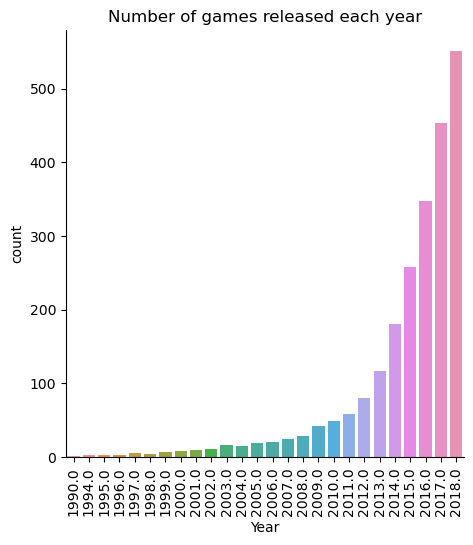

In [43]:
dataset['Year'] = pd.to_numeric(dataset['release_date'].str[-4:], errors='coerce')
dataset = dataset[dataset['Year'] <= 2018]
sns.catplot(x="Year", kind="count", data=dataset).set(title='Number of games released each year').set_xticklabels(rotation=90)

### Online multiplayer
- These next graphs I want to see when games started implementing online multiplayer
- From this graph, we can see that the percentage of games that implemented online multiplayer grew steadly year after year starting from around 2000 but really picking up from around 2012.
##### Code wrangling and clean notes
- is_multiplayer column simply sees if the game_details cell contains the text 'multi'
- is_online column simply sees if the game_details cell contains the text 'online'
- is_multiplayer and is_online are then converted to 1 or 0
- The two columns are then combined using AND into a new column and then counted to get the total number of games that implemented multiplayer

AxesSubplot(0.125,0.11;0.775x0.77)


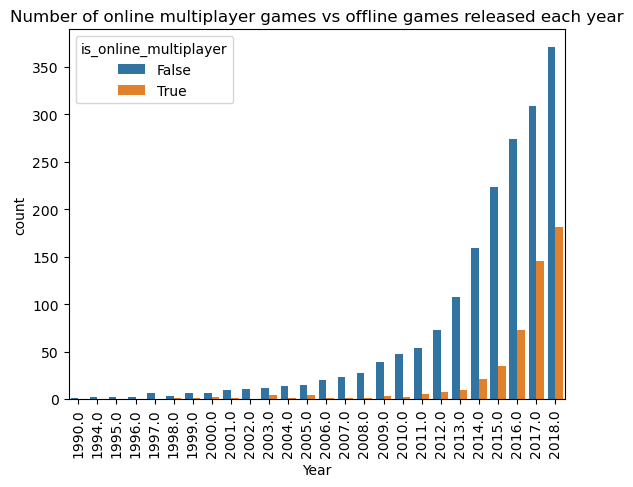

In [44]:
dataset['is_multiplayer'] = np.where(dataset['game_details'].str.contains('multi', case=False), True, False)
dataset['is_online'] = np.where(dataset['game_details'].str.contains('online', case=False), True, False)
dataset['is_online_multiplayer'] = np.where((dataset['is_multiplayer'] == True) & (dataset['is_online'] == True), True, False)

graph = sns.countplot(dataset, x="Year", hue="is_online_multiplayer")
graph.tick_params(axis='x', rotation=90)
graph.set(title='Number of online multiplayer games vs offline games released each year')
print(graph)

### Price analysis
- We can also see that the price of games have gone up over the years. This might be due to inflation or to the massive complexity of modern games that require more money
- But there are still many games that are free to play. This is probably due to the fact that many games are now online multiplayer and free to play games can make money through microtransactions

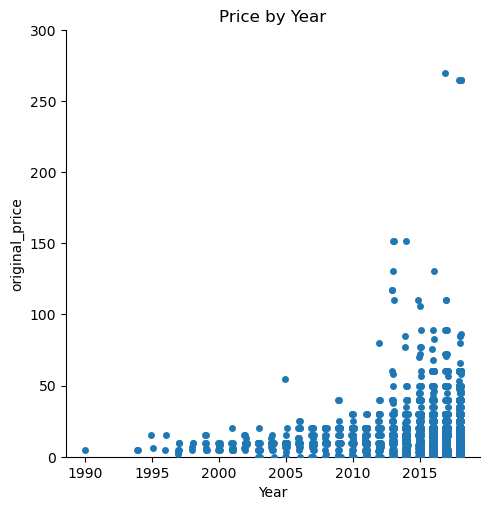

In [45]:
# set scale limit to 300 as there are some outliers
sns.catplot(y="original_price", x='Year', data=dataset, native_scale=True).set(ylim=(0,300)).set(title="Price by Year")
# sns.displot(dataset, x="original_price", y='Year', kind="kde", fill=True).set_xticklabels(rotation=90).set(xlim=(0,100))

### Achievements
- We can see from this graph below, more and more games have been implementing achevements when compared to older games.
- Though most game only implement a few acheivements rather than a lot.

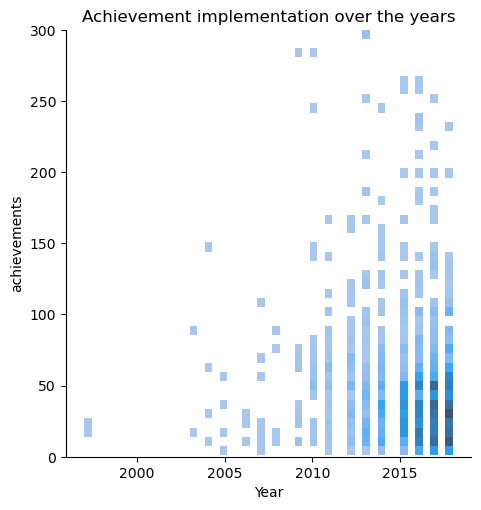

In [46]:
sns.displot(y='achievements', x='Year', data=dataset).set(ylim=(0,300)).set(title="Achievement implementation over the years")

## Additional Resources Used in Tableau Dashboard
CPI data: https://www.rateinflation.com/consumer-price-index/usa-historical-cpi/